In [1]:
import numpy as np
import pandas as pd

        
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
        


train = pd.read_csv('train.csv', index_col='id')
display(train.head())

test = pd.read_csv('test.csv', index_col='id')
display(test.head())

submission = pd.read_csv('sample_submission.csv', index_col='id')
display(submission.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
0,A,B,A,C,B,D,A,E,E,G,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
5,A,B,A,C,B,D,A,E,C,L,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
15,A,B,A,C,B,D,A,E,C,F,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
16,A,A,B,A,B,D,A,E,E,F,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
17,A,B,A,A,B,B,A,E,E,I,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


,target
id,
0,0.5
5,0.5
15,0.5
16,0.5
17,0.5


In [2]:
for c in train.columns:
    if train[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(train[c].values)
        test[c] = lbl.transform(test[c].values)
        
display(train.head())

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,1,3,0,4,2,8,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,1,0,0,0,1,1,0,4,0,5,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,0,0,0,2,1,3,0,1,2,13,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,0,0,0,2,1,3,0,4,6,10,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,0,1,0,0,1,1,0,4,2,5,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [3]:
target = train.pop('target')
X_train, X_test, y_train, y_test = train_test_split(train, target, train_size=0.60)

In [4]:
model_dummy = DummyRegressor(strategy='median')
model_dummy.fit(X_train, y_train)
y_dummy = model_dummy.predict(X_test)
score_dummy = mean_squared_error(y_test, y_dummy, squared=False)
print(f'{score_dummy:0.5f}')

0.88886


In [5]:
model_simple_linear = LinearRegression(fit_intercept=True) # data is not centered, we need an intercept!
model_simple_linear.fit(X_train, y_train)
y_simple_linear = model_simple_linear.predict(X_test)
score_simple_linear = mean_squared_error(y_test, y_simple_linear, squared=False)
print(f'{score_simple_linear:0.5f}')

0.86948


In [6]:
def plot_results(name, y, yhat, num_to_plot=10000, lims=(0,12), figsize=(6,6)):
    plt.figure(figsize=figsize)
    score = mean_squared_error(y, yhat, squared=False)
    plt.scatter(y[:num_to_plot], yhat[:num_to_plot])
    plt.plot(lims, lims)
    plt.ylim(lims)
    plt.xlim(lims)
    plt.title(f'{name}: {score:0.5f}', fontsize=18)
    plt.show()

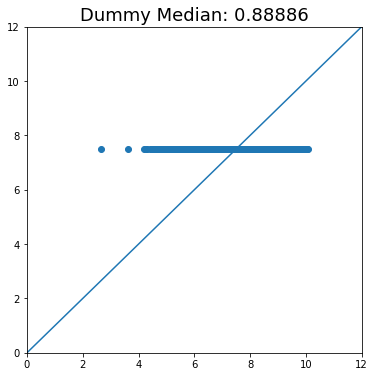

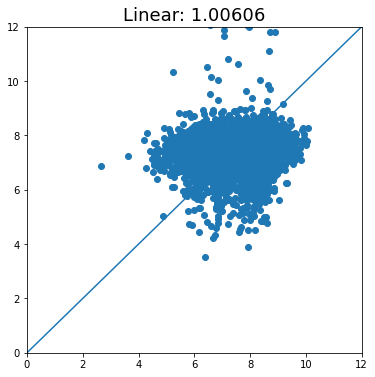

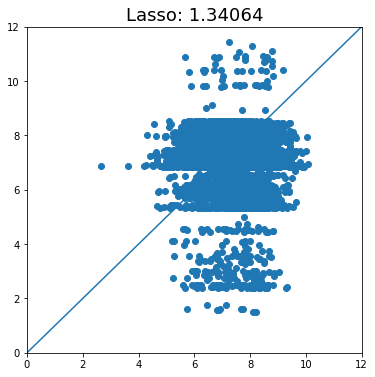

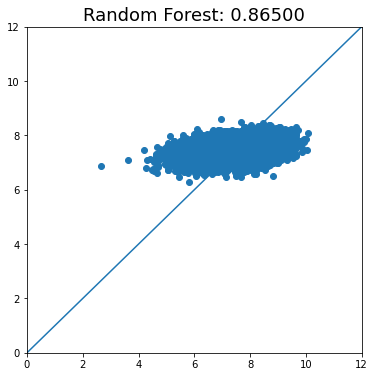

In [7]:
model_names = ["Dummy Median", "Linear",  "Lasso", "Random Forest"]

models = [ 
    DummyRegressor(strategy='median'),
    LinearRegression(fit_intercept=False),
    Lasso(fit_intercept=False),
    RandomForestRegressor(n_estimators=50, n_jobs=-1)]

for name, model in zip(model_names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_results(name, y_test, y_pred)

In [ ]:
model = RandomForestRegressor(n_estimators=50, n_jobs=-1)
model.fit(train, target)
submission['target'] = model.predict(test)
submission.to_csv('random_forest.csv')